In [51]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
data_wca = pd.read_csv("Wholesale Customer.csv")

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [10]:
data_wca.shape

(440, 9)

In [11]:
data_wca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [12]:
data_wca.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [45]:
pd.isnull(data_wca).sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

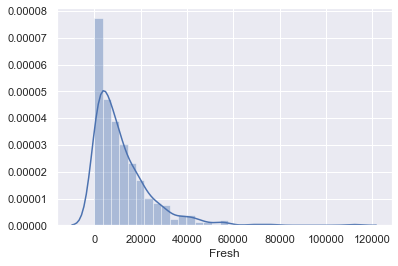

In [67]:
sns.distplot(data_wca['Fresh']);

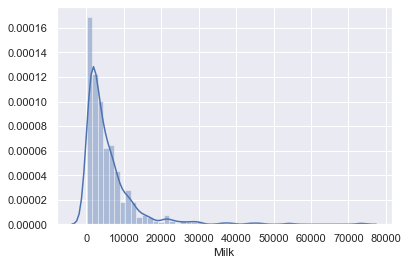

In [59]:
sns.distplot(data_wca['Milk']);

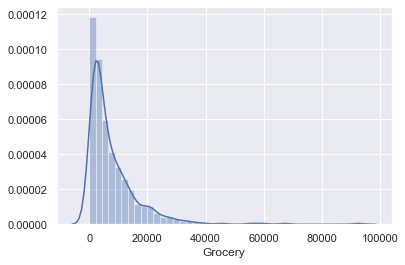

In [60]:
sns.distplot(data_wca['Grocery']);

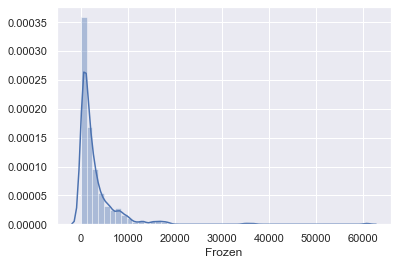

In [61]:
sns.distplot(data_wca['Frozen']);

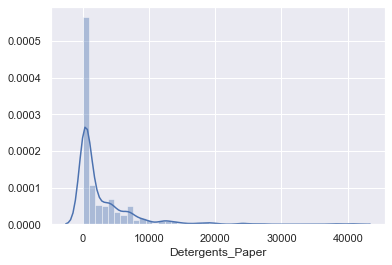

In [62]:
sns.distplot(data_wca['Detergents_Paper']);

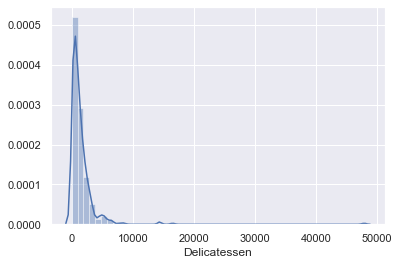

In [63]:
sns.distplot(data_wca['Delicatessen']);

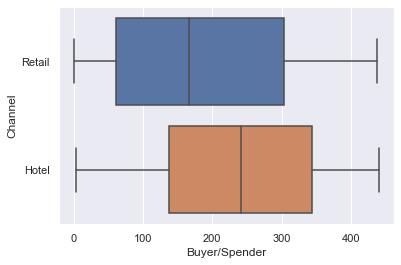

In [64]:
sns.boxplot(x="Buyer/Spender", y="Channel", data=data_wca);

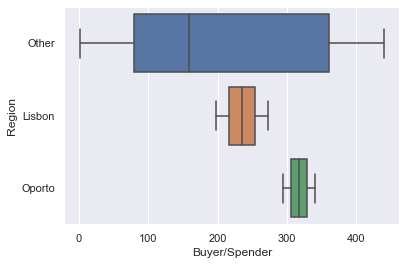

In [65]:
sns.boxplot(x="Buyer/Spender", y="Region", data=data_wca);

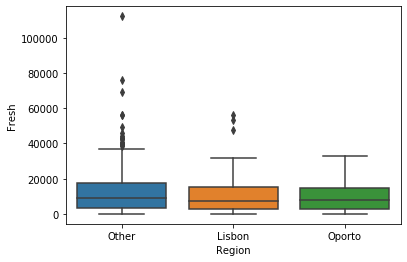

In [35]:
sns.boxplot(x="Region", y="Fresh", data=data_wca);

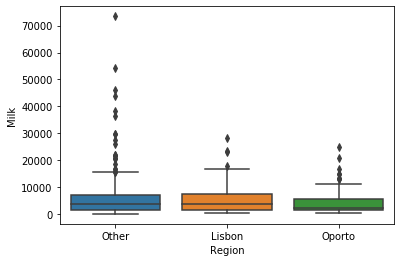

In [36]:
sns.boxplot(x="Region", y="Milk", data=data_wca);

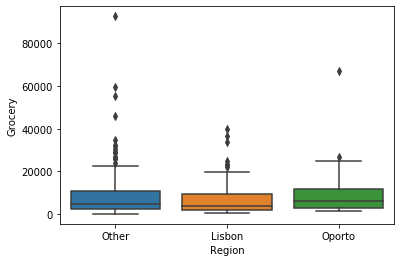

In [37]:
sns.boxplot(x="Region", y="Grocery", data=data_wca);

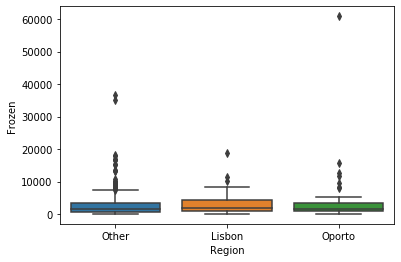

In [38]:
sns.boxplot(x="Region", y="Frozen", data=data_wca);

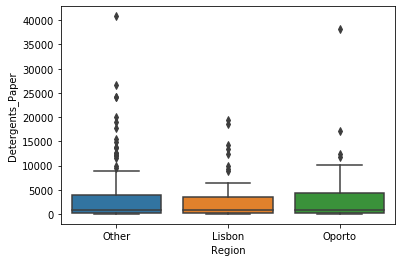

In [39]:
sns.boxplot(x="Region", y="Detergents_Paper", data=data_wca);

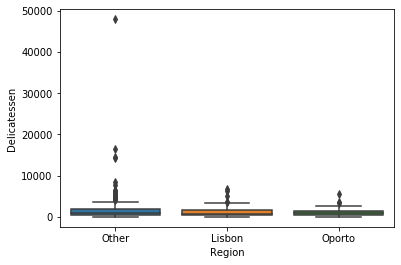

In [40]:
sns.boxplot(x="Region", y="Delicatessen", data=data_wca);

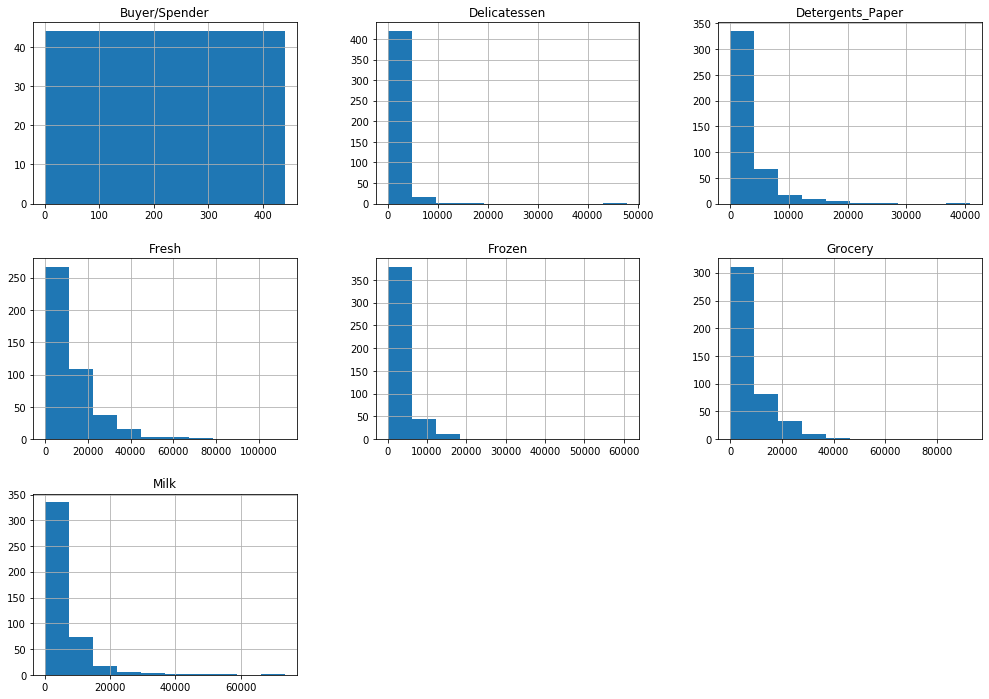

In [32]:
data_wca.hist(figsize = (17,12));

###  Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [41]:
data_wca.groupby(['Region','Channel'])['Region'].sum().sort_values(ascending=False).head(1)


Region  Channel
Other   Hotel      OtherOtherOtherOtherOtherOtherOtherOtherOtherO...
Name: Region, dtype: object

In [42]:
data_wca.groupby(['Region','Channel'])['Channel'].sum().sort_values(ascending=False).head(1)

Region  Channel
Other   Retail     RetailRetailRetailRetailRetailRetailRetailReta...
Name: Channel, dtype: object

In [43]:
data_wca.groupby(['Region','Channel'])['Region'].sum().sort_values(ascending=False).tail(1)

Region  Channel
Lisbon  Retail     LisbonLisbonLisbonLisbonLisbonLisbonLisbonLisb...
Name: Region, dtype: object

In [44]:
data_wca.groupby(['Region','Channel'])['Channel'].sum().sort_values(ascending=False).tail(1)

Region  Channel
Oporto  Hotel      HotelHotelHotelHotelHotelHotelHotelHotelHotelH...
Name: Channel, dtype: object

### 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

In [45]:
data_wca.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [46]:
import seaborn as sns

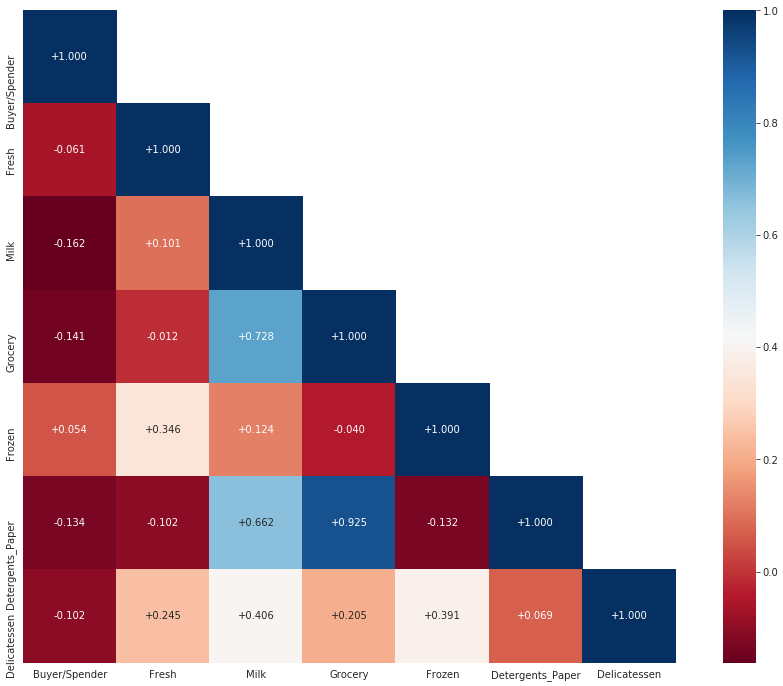

In [60]:
corr = data_wca.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
plt.figure(figsize=(17,12))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.3f');

### 1.3 based on a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

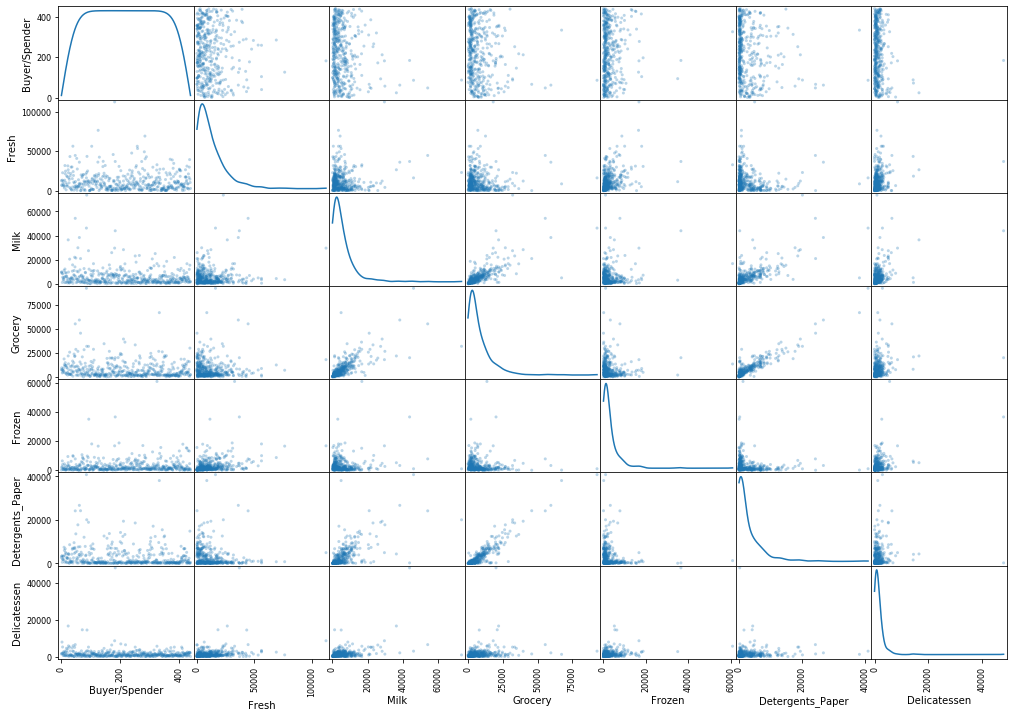

In [51]:
pd.plotting.scatter_matrix(data_wca, alpha = 0.3, figsize = (17,12), diagonal = 'kde');

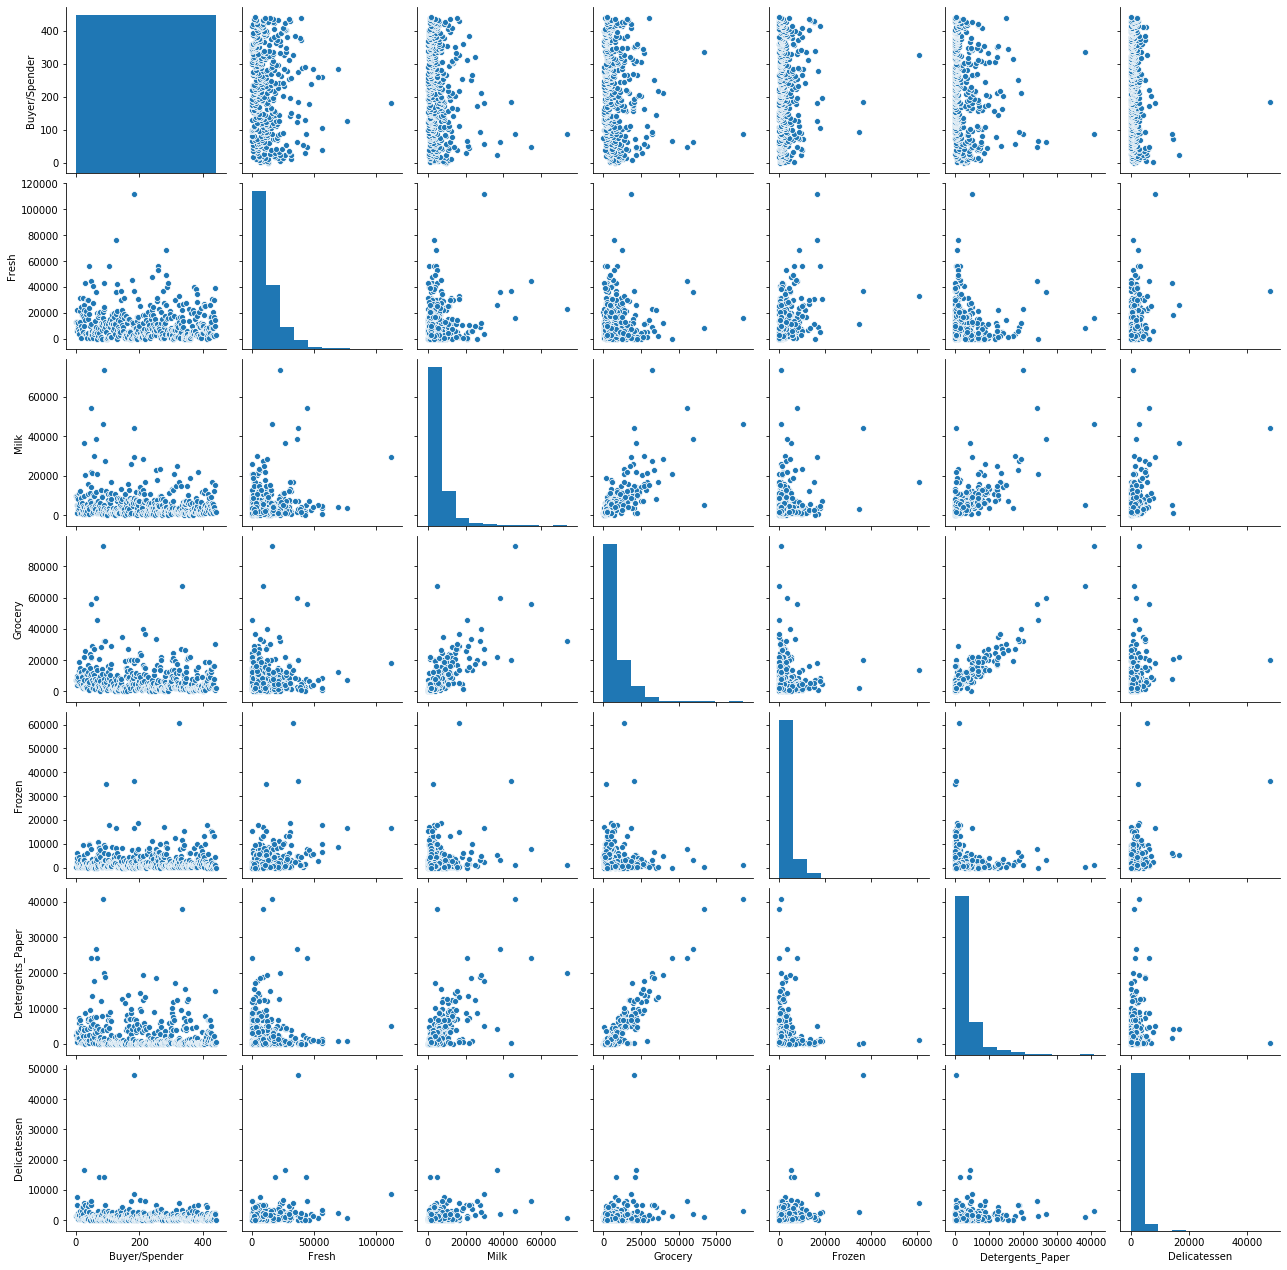

In [41]:
sns.pairplot(data_wca)

### 1.4 Are there any outliers in the data?

Below items hold outliers 
1.Fresh
2.Milk
3.Grocery
4.Frozen
5.Detergents_Paper
6.Delicatessen


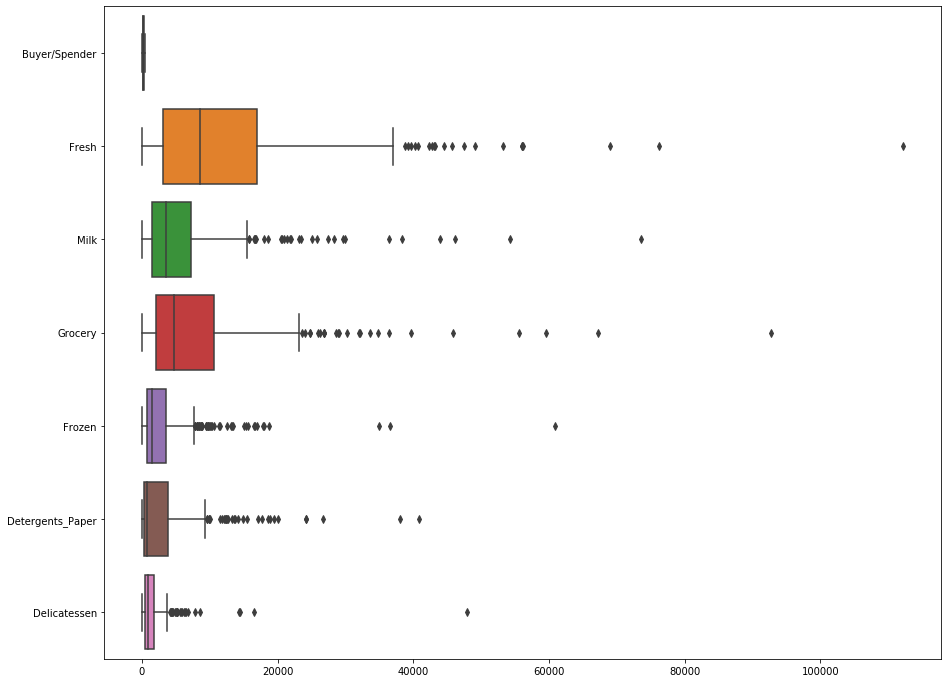

In [54]:
plt.figure(figsize=(15,12))
sns.boxplot(data=data_wca, orient="h");
print('Below items hold outliers \n1.Fresh\n2.Milk\n3.Grocery\n4.Frozen\n5.Detergents_Paper\n6.Delicatessen')

### 1.5 based on this report, what are the recommendations?

In [1]:
print('Below are recommendations \n1.Detergents_Paper is highly correlated with Grocery\n2.Grocery is highly correlated with Detergents_Paper')

Below are recommendations 
1.Detergents_Paper is highly correlated with Grocery
2.Grocery is highly correlated with Detergents_Paper
